# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from functools import partial
import sklearn

In [3]:
from fastai import *
from fastai.vision import *
__version__

'1.0.38'

In [4]:
import torch
from torch import nn
import torchvision
torch.__version__

'1.0.0'

# Load and Preprocess Data and Train Resnet

In [8]:
data_path = Path('./flower_data/'); data_path

PosixPath('flower_data')

In [9]:
train_labels = [p.name for p in (data_path / 'train').iterdir()]
len(train_labels)

102

In [10]:
valid_labels = [p.name for p in (data_path / 'valid').iterdir()]
len(valid_labels)

102

In [11]:
src = (ImageItemList.from_folder(data_path)
       .split_by_folder(train='train', valid='valid')
       .label_from_folder())

In [12]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [13]:
bs = 64
data = src.transform(tfms, size=256).databunch(bs=bs).normalize(imagenet_stats)

In [14]:
# data.show_batch(rows=2, figsize=(10, 5))

In [15]:
# data.train_ds[0], len(data.valid_ds.classes)

In [16]:
arch = models.resnet34

In [18]:
learn = create_cnn(data, arch, metrics=[accuracy])

In [ ]:
learn.lr_find(); learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy


In [19]:
lr = 2e-2
lr, lr/25.0

(0.02, 0.0008)

In [20]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,1.278086,0.869963,0.766504
2,1.244535,0.596486,0.849633
3,0.703713,0.291110,0.926650
4,0.352758,0.572344,0.949878
5,0.239932,0.435344,0.958435


In [30]:
learn.opt._lr, learn.opt._wd

([8e-09, 8e-09, 8e-08], [0.01, 0.01, 0.01])

In [33]:
list(learn.opt.param_groups[0].keys())

['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad']

In [74]:
t = torch.tensor([1., 2.])
t.dtype

torch.float32

In [71]:
t.data.add_(-0.01 * 0.1, t.data)

tensor([0.9990, 1.9980])

In [72]:
t.data.add(-0.01 * 0.1)

tensor([0.9980, 1.9970])

In [64]:
torch.Tensor.add(t, t)

tensor([2, 4])

In [127]:
t = torch.tensor([2.])
t, t.data.add_(10 + t.data)

(tensor([14.]), tensor([14.]))

In [128]:
t = torch.tensor([2.])
t, t.add_(10, t)

(tensor([22.]), tensor([22.]))

In [129]:
t = torch.tensor([2.])
t, t.data.add_(10 * t.data)

(tensor([22.]), tensor([22.]))

In [20]:
learn.save(f'{arch.__name__}-stage1.fai')

In [27]:
learn.load(f'{arch.__name__}-stage1.fai');

In [28]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


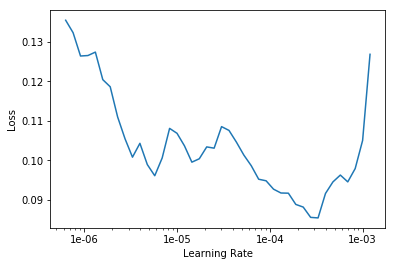

In [29]:
learn.lr_find(); learn.recorder.plot()

In [30]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy
1,0.107321,0.146775,0.980440
2,0.080965,0.117454,0.974328
3,0.109680,1.021700,0.965770
4,0.079998,0.148771,0.973105
5,0.078263,0.269821,0.976773
6,0.069614,0.103363,0.977995
7,0.039439,0.148160,0.973105
8,0.028461,0.117454,0.976773
9,0.020788,0.114007,0.980440
10,0.025865,0.113449,0.979218


In [31]:
learn.save(f'{arch.__name__}-stage2.fai')

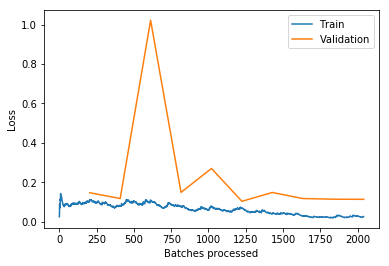

In [32]:
learn.recorder.plot_losses()

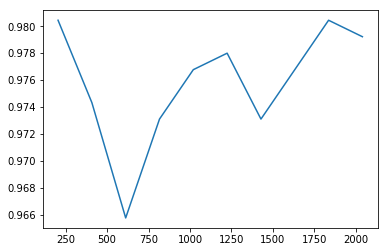

In [33]:
learn.recorder.plot_metrics()

In [35]:
data.batch_size

32

In [46]:
data.train_ds.y.items.shape[0] * 10 / data.batch_size

2047.5